### Latex symbol

http://www.rpi.edu/dept/arc/training/latex/LaTeX_symbols.pdf

## OPTIMIZATION FOR TRAINING DEEP LEARNING



Optimization in deep learning involves finding set of parameters $\theta$ for a model to reduce a cost function $J(\theta)$. Before diving into the details of different optimization methods used in deep learning, it would be better to understand why the optimization is needed at the first hand, what kind of challenges exist there. 

To begin with, we define a general cost function to be optimized as follows:

$$\color{orange}{\mathbb{E}_{(x,y) \sim\hat{p}_{data}} L(f(x;\theta),y)\tag{1}}$$

where $L$ is the loss function, $f(x;\theta)$ is the predicted output given input $x$, and $\hat{p}_{data}$ is the empirical distribution. 

As the goal of deep learning models is to reduce the expected generalization error given by above equation, we can minimize the expected loss on the training set. This has to be done on training set since the true distribution of the data is unknown. 

$$\color{orange}{\mathbb{E}_{(x,y) \sim\hat{p}_{data}} L(f(x;\theta),y) = \frac{1}{m}\sum^m_{i=1}L(f(x^{(i)};\theta),y^{(i)})\label{eq:error_minimize} \tag{2}}$$

where $m$ is the number of training examples. 

The nature of the cost/objective function given in  equation $\eqref{eq:error_minimize}$ is important for optimization task. In some optimizations problems, the objective-function is just too complicated to evaluate directly at every iteration, and in this case, we use surrogate functions, functions that mimic most of the properties of the true objective-function, but that is much simpler analytically and/or computationally.


### 1. Surrogate Loss Functions

The main tool used by researchers to produce the result in machine learning is the optimization of the loss function (or sometimes quality function). However, the nature or the experiment being modeled doesn't always allows us to construct the loss function conveniently, for example as  {0,1}  for fail/success respectively. Instead if this, the surrogate models are used. The underlying principle can be formulated as follows: make the result computationally convenient without losing the sense.

Ideally, your loss function should be the true loss, in real life. In a business, your true loss function is: -profit over the lifetime of the business. A lot of time it's difficult to measure the true loss, so your loss function should be a "surrogate" (approximation) of the true loss.

For instance, below figure illustrates some loss function including $0-1$ loss. We may take an example of the Hinge loss plotted in the figure for a positive example. One useful property
of hinge loss is that it is an upper bound on 0–1 loss; this is a useful property for a surrogate loss function, since it means that if you make the hinge loss small, you have  also made 0–1 loss small. 

<a href="https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/readings/L04%20Training%20a%20Classifier.pdf"><img src="fig/loss_functions.png" width=300 height=300 /></a>



It is important to note that  a machine learning algorithm usually minimizes
a surrogate loss function but halts when a convergence criterion based on **early
stopping** is satisfied. Typically the early stopping criterion is based
on the true underlying loss function, such as 0-1 loss measured on a validation set,
and is designed to cause the algorithm to halt whenever overfitting begins to occur.
Training often halts while the surrogate loss function still has large derivatives,
which is very different from the pure optimization setting, where an optimization
algorithm is considered to have converged when the gradient becomes very small.

### 2. Batch and Minibatch Algorithms

The optimization algorithms compute gradient each update using only subset of training set. The gradient and the optimization algorithms are explained in details at later sections of this notebook.

The optimization algorithms are sorted into three categories given below:

* Batch Algorithms: These are the algorithms that use entire training set for gradient update. They are also called deterministic gradient methods. 

* Stochastic Algorithms: These are the methods that use a single example at a time to compute gradient. 

* Minibatch Stochastic Methods: These are the methods that use more than one sample but fewer than entire training set to compute gradient. 

The most commonly used methods in deep learning belong to minibatch stochoastic family. These type of methods require an optimally selected minibatch size to compute gradient accordingly. There are different factors to consider while choosing an optimal minibatch size which are: 
* Larger batches provide a more accurate estimate of gradient.
* Multicore hardware architectures usually underutilized with small batches. 
* When using GPU, it is common to select power of 2 batch sizes for better runtime.
* Small batches offer regularization effect. However, in this case it is crucial to choose small learning rate to maintain the stability which is affected by the high variance in the estimate of the gradient. Also, once should except the training time 


### 3. Challenges in Neural Network Optimization

It is a fact that each optimization task brings challenges on the table in machine learning. The problems encountered mostly during optimization of any ML task can be seen in optimization of deep learning models too. These challenges are:

* Ill conditioning
* Local Minima
* Plateues, Saddle Points and Other Flat Regions
* Cliffs and Exploding Gradients
* Inexact Gradients
* Poor Correspondence between local and global structure
[TODO] Expain them in details.

### 4. Optimization Algorithms


#### 4.1 Intuitive Explanation  of Gradient

The gradient is a significant term that plays an important role in how the deep learning models learn over time. All the optimization algorithms used in deep learning are based on **gradient descent**. As the name suggests, Gradient means “slope” & Descent means “to go down”. Gradient Descent follows the slope of the curve and descends(“goes down”) to those combination of parameters in the function which gives the minimum value.

Intuitively speaking, let's consider a path of a river originating from top of a mountain as shown below picture. 

<img src="fig/river.JPG" width=500 height=500 />


The goal of gradient descent is exactly what the river strives to achieve - namely, reach the bottom most point (at the foothill) climbing down from the mountain.

Now, if the terrain of the mountain is shaped in such a way that the river doesn't have to stop anywhere completely before arriving at its final destination (which is the lowest point at the foothill, then this is the ideal case we desire. In deep learning, this is equivalent to saying that the global minimum (or optimum) of the solution starting from the initial point (top of the hill) is reached.

However, it could be that the nature of terrain forces several pits in the path of the river, which could force the river to get trapped and stagnate. In deep learning terms, such pits are termed as local minima solutions, which is not desirable. Luckily, we can get rid of this with different ways that are discussed in details further. 

Gradient Descent therefore is prone to be stuck in local minimum, depending on the nature of the terrain. But, when you have a special kind of mountain terrain (which is shaped like a bowl, in math terms this is called a Convex Function), the algorithm is always guaranteed to find the optimum.

Also, depending on where at the top of the mountain you initial start from (ie. initial values of the function), you might end up following a different path. Similarly, depending on the speed at the river climbs down (ie. the learning rate or step size for the gradient descent algorithm), you might arrive at the final destination in a different manner. Both of these criteria can affect whether you fall into a pit (local minima) or are able to avoid it.

Now lets visualize a simple gradient descent algorithm and how it works. 

```
for i in range(nb_epochs):
  params_grad = evaluate_gradient(loss_function, data, params)
  params = params - learning_rate * params_grad
```

In [22]:
"""
Given the starting point of any `x` gradient descent
should be able to find the minimum value of x for the
cost function `f` defined below.
"""
import random

def f(x):
    """
    Quadratic function.

    It's easy to see the minimum value of the function
    is 5 when is x=0.
    """
    return x**2 + 5


def df(x):
    """
    Derivative of `f` with respect to `x`.
    """
    return 2*x

def gradient_descent_update(x, gradx, learning_rate):
    """
    Performs a gradient descent update.
    """
    # TODO: Implement gradient descent.
    # x = x - learning_rate * gradient_of_x
    x = x - (gradx * learning_rate)
    
    # Return the new value for x
    return x

# Random number between 0 and 10,000. Feel free to set x whatever you like.
random.seed(123)
x = random.randint(0, 10000)
# TODO: Set the learning rate
learning_rate = 0.1
epochs = 100
cost_list = []
gradx_list = []
for i in range(epochs+1):
    cost = f(x)
    gradx = df(x)
    cost_list.append(cost)
    gradx_list.append(gradx)
    #print("EPOCH {}: Cost = {:.3f}, x = {:.3f}".format(i, cost, gradx))
    x = gradient_descent_update(x, gradx, learning_rate)

Text(0, 0.5, 'gradient')

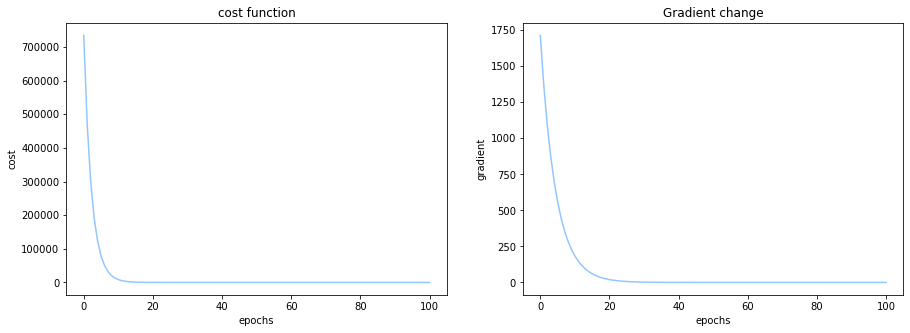

In [36]:
# Lets visualize it
# Create two subplots and unpack the output array immediately
import matplotlib.pyplot as plt
x = range(epochs+1)

figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

axes[0].plot(x, cost_list)
axes[0].set_title("cost function")
axes[0].set_xlabel("epochs")
axes[0].set_ylabel("cost")
#create specific subplots

axes[1].plot(x, gradx_list)
axes[1].set_title("Gradient change")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("gradient")


#figure.tight_layout()



The below figures illustrates a basic cost function and how it is updated by gradient over the epochs. As once can notice from the figure,  the cost is reduced whilst the gradient approaches to zero.  

#### 4.2 Gradient Descent Algorithms

There are three variants of gradient descent, which differ in how much data we use to compute the gradient of the objective function

#### 4.2.1 Batch Gradient Descent 

This is a vanilla gradient descent and computes the gradient of the cost function w.r.t. to the parameters 
$\theta$ for the entire training dataset:
$$\color{orange}{\theta = \theta - \eta \cdot \nabla_\theta J( \theta)\label{eq:batch_sgd}\tag{3}}$$

where $\eta $ is ***learning rate***.

In code level, we represent the equation  $\eqref{eq:batch_sgd}$ as follows:

```
for i in range(nb_epochs):
  params_grad = evaluate_gradient(loss_function, data, params)
  params = params - learning_rate * params_grad
```

As we need to calculate the gradients for the whole dataset to perform just one update, batch gradient descent can be very slow and is intractable for datasets that don't fit in memory.

#### 4.2.2 Stochastic gradient descent

In contrast to batch gradient descent, stochastic gradient descent (SGD) updates  for each training example 
$x^{(i)}$ and label $y^{(i)}$:

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i)}; y^{(i)})$$

SGD performs one update at a time. It is therefore usually much faster and can also be used to learn online.
SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily

```

for i in range(nb_epochs):
  # shuffle data for better convergence
  np.random.shuffle(data)
  for example in data:
    params_grad = evaluate_gradient(loss_function, example, params)
   params = params - learning_rate * params_grad
 ```

#### 4.2.3 Minibatch gradient descent

As it mentioned above, minibatch gradient descent performs an update for every mini-batch of 
$n$ training examples.

$$\theta = \theta - \eta \cdot \nabla_\theta J( \theta; x^{(i:i+n)}; y^{(i:i+n)})$$

```

for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=32):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
```

#### 4.3 Gradient Descent Optimization Methods
In this section, we will cover the optimization methods used for gradient descent algorithms to solve following issues:
* Choosing a proper learning rate 
* Learning rate schedules for adjusting the learning rate during training
* using same learning rate for all parameters update regardless of having sparse features

[TODO] add more from the papers

#### 4.3.1 Momentum
SGD has trouble navigating ravines, i.e. areas where the surface curves much more steeply in one dimension than in another, which are common around local optima. This problem is solved by introducing momentum inspired from physics. 
Momentum helps accelerate SGD in the relevant direction and dampens oscillations.
It does this by adding a fraction  $\gamma$  of the update vector of the past time step to the current update vector:

$$ \begin{align} 
\begin{split} 
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta) \\ 
\theta &= \theta - v_t 
\end{split} 
\end{align}
$$

The momentum term 
$\gamma$
 is usually set to 0.9 or a similar value.

Intuitively speaking, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity if there is air resistance). Therefore during the parameter update,he momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

#### 4.3.2 Nesterov accelerated gradient

There is a problem when a ball that rolls down a hill, blindly following the slope. It would be wise to use a ball that has a notion of where it is going so that it knows to slow down before the hill slopes up again.

Nesterov accelerated gradient (NAG)is a way to give our momentum term this kind of prescience. We know that we will use our momentum term $\gamma v_{t-1}$ to move the parameters $\theta$. Computing $\theta - \gamma v_{t-1}$
 thus gives us an approximation of the next position of the parameters (the gradient is missing for the full update), a rough idea where our parameters are going to be.

\begin{align} 
\begin{split} 
v_t &= \gamma v_{t-1} + \eta \nabla_\theta J( \theta - \gamma v_{t-1} ) \\ 
\theta &= \theta - v_t 
\end{split} 
\end{align}

The aforementioned techniques are to adapt our updates to the slope of our error function and speed up SGD in turn.

#### 4.4 Algorithms with Adaptive Learning Rate

In this section we will cover the algorithms used for adaptive learning rate.


#### 4.4.1 AdaGrad
AdaGrad adapts the learning rate in such a way that it performs smaller updates (low learning rates) for parameters associated with frequently occurring features, and larger updates (high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data. The algorithm to perform learning rate update is shown below.

<img src="fig/adagrad.png" width=500 height=500 />

#### 4.4.2 RMSProp

RMSprop is an another wildely used adaptive learning rate method.It tries to resolve Adagrad's radically diminishing learning rates.

<img src="fig/rmsprop.png" width=500 height=500 />

#### 4.4.3 Adam
Adaptive Moment Estimation (Adam) is another method for adaptive learning rates for each parameter. Adam behaves like a heavy ball with friction, which thus prefers flat minima in the error surface.  Adam works well in practice and compares favorably to other adaptive learning-method algorithms.

<img src="fig/adam.png" width=500 height=500 />

In addition to aforementioned optimization algorithms for gradient update, there is also few other algorithms used in a same manner. Which are: 
* Adadelta
* AdaMax
* Nadam
* AMSGrad
* AdamW
* QHAdam  
* AggMo 

For comparison of each optimization methods mentioned above, please check [this blog](https://johnchenresearch.github.io/demon/).

### Choosing Right Optimization

Unfortunately there is no rule of thumb here about how to choose the best optimization methods.  Currently, the most popular optimization algorithms actively in use include SGD, SGD with momentum, RMSProp, RMSProp with momentum, AdaDelta and Adam.While training neural nets, it is a trial and error process to find out right optimization methods for a particular task. 

Refer to [this notebook](#https://nbviewer.jupyter.org/github/ilguyi/optimizers.numpy/blob/master/optimizer.tf.all.opt.plot.ipynb) for a behavior of each optimization methods. 


#### Parameter Initialization Strategies
The parameter initialization step can be critical to the model’s ultimate performance, and it requires the right method. There are two way that we can initialize parameters. However, each of them brings issues together. 

1. Zero Initialization: All weights are initialized with value of zero. That one causes a serious issue which is that If all the weights are initialized with 0, the derivative with respect to loss function is the same for every weight, thus all weights have the same value in subsequent iterations.


2. Random Initialization: The parameters (weights) are initialized with random numbers in this approach. However, it has following issues: 

    * If weights are initialized with very high values the term **np.dot(W,X)+b** becomes significantly higher and if an activation function like sigmoid() is applied, the function maps its value near to 1 where the slope of gradient changes slowly and learning takes a lot of time. Exploding gradients — This is the exact opposite of vanishing gradients. 
    * If weights are initialized with low values it gets mapped to 0, where the case is the same as above. This problem is often referred to as vanishing gradient.
    
To solve the problems associated with above mentioned approaches, there exists new methods to initialize parameters. The mostly used methods are  He initialization, Xavier initialization. Refer to [deeplearning.ai](https://www.deeplearning.ai/ai-notes/initialization/) blog for comprehensive comparison.